# Credit Card Fraud Detection

### Dataset: Kaggle-https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [36]:
# Import libraries

import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from warnings import filterwarnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [3]:
# Load data

# reading data using pandas
data = pd.read_csv("C:/Users/amrit/OneDrive/Documents/GitHub/Data-Science-Project-Credit-Card-Fraud-Detection/Dataset/creditcard.csv"
)
# display data
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Expolatory Data Analysis (EDA)

In [4]:
# Check for NA values
data[data.columns].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

So, no NA values found.

In [5]:
# check of duplicate rows
duplicates=data.duplicated(keep=False)
# Show the duplicate rows
duplicate_rows = data[duplicates]
print(duplicate_rows)


# drop duplicates
# data = data.drop_duplicates() # not removig the duplicates for now

            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

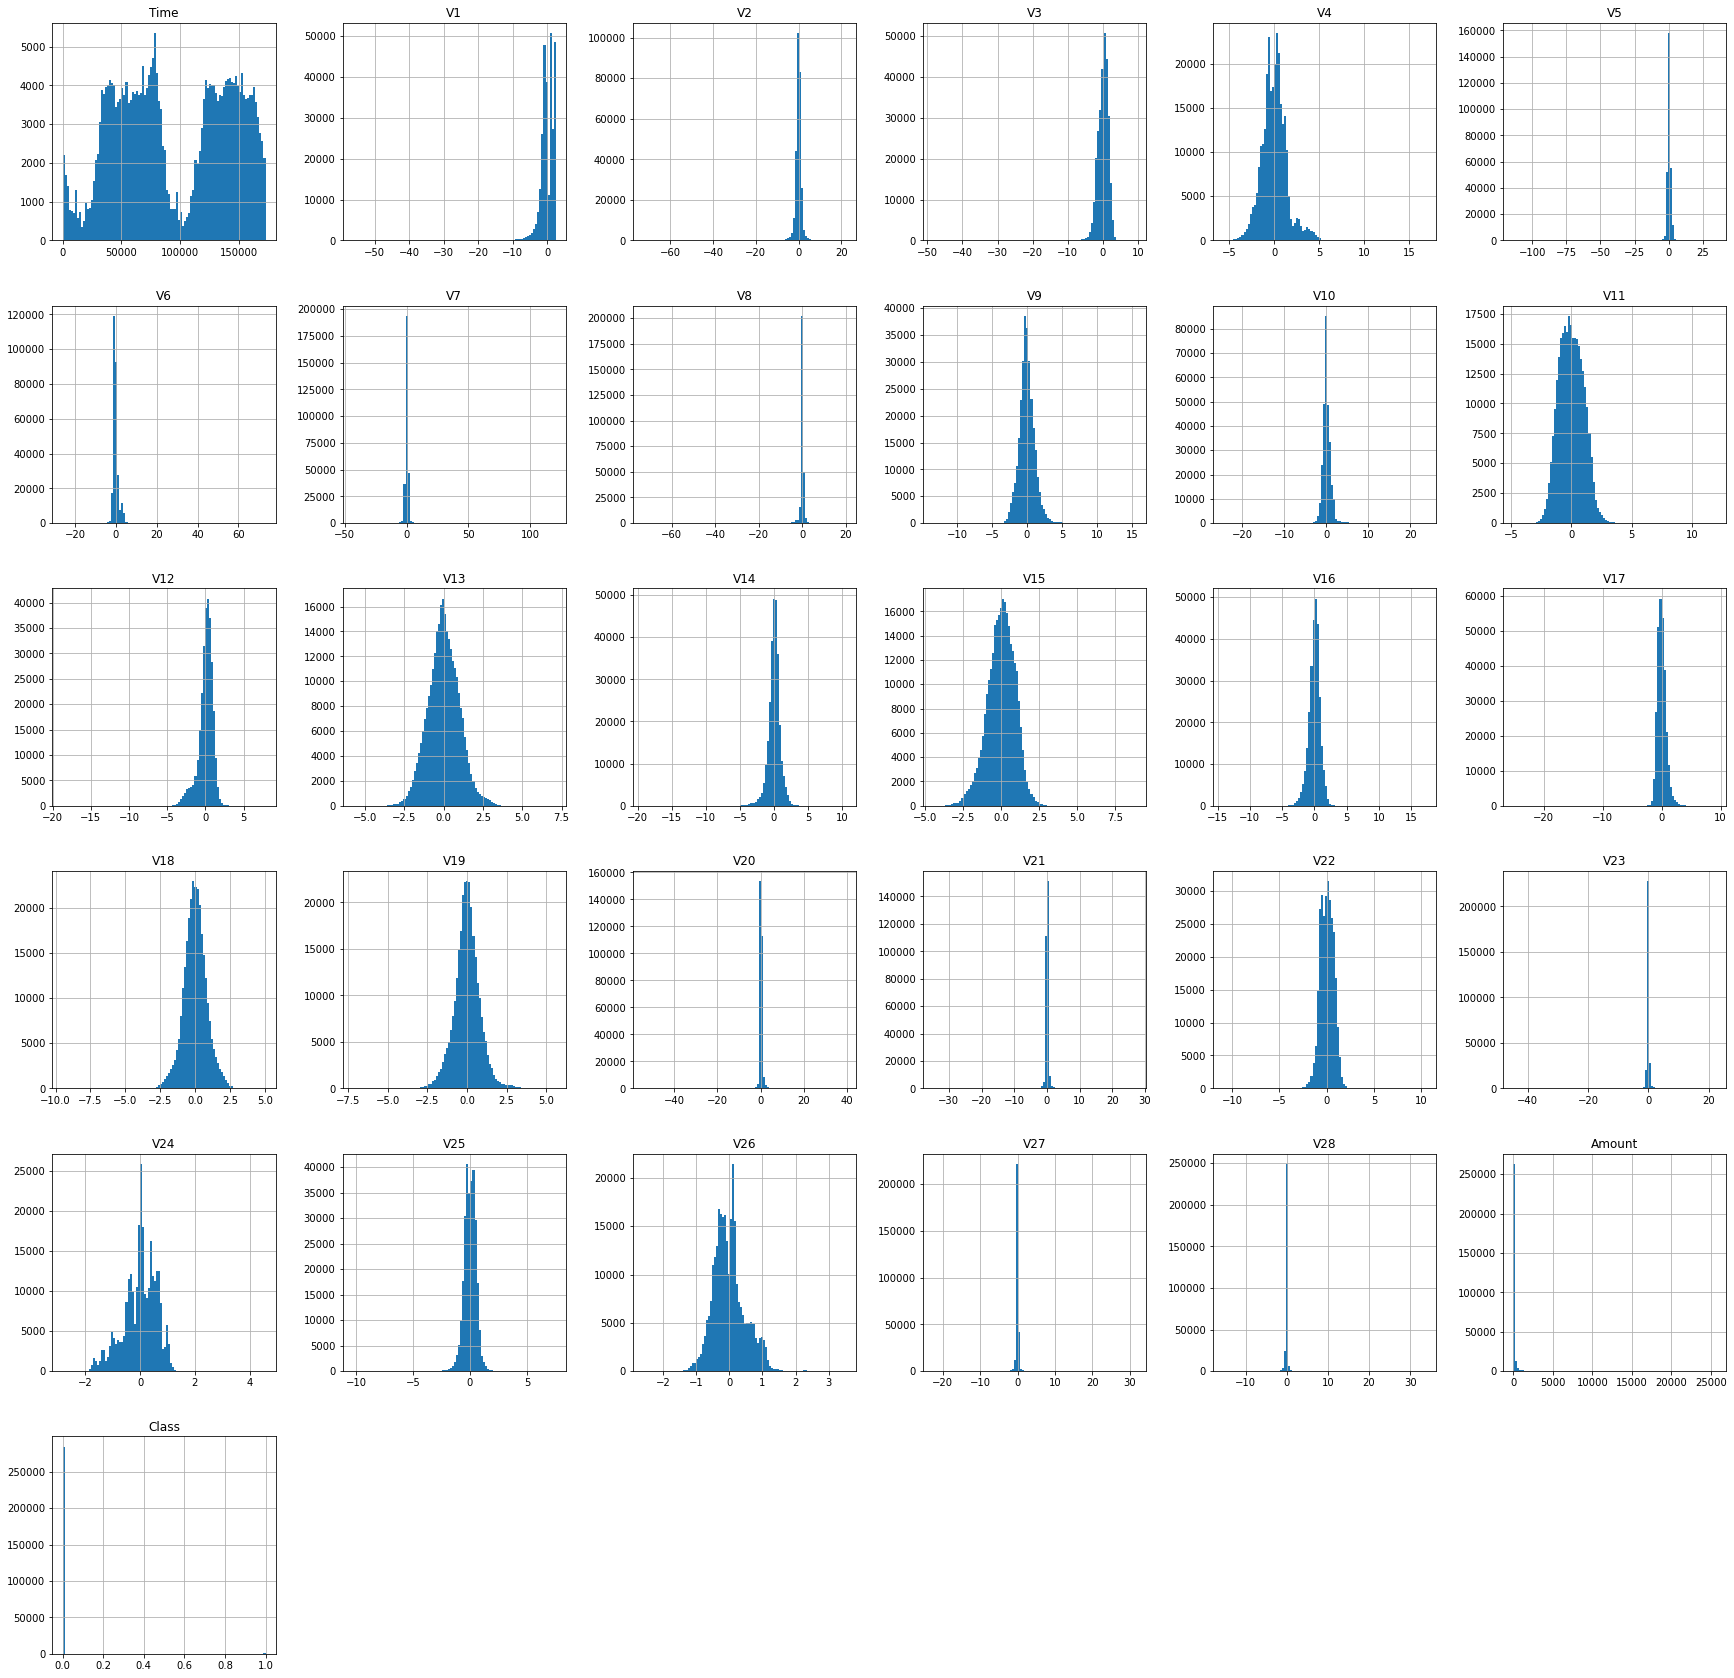

In [6]:
# visualizing the data
data.hist(bins = 100, figsize= (30,30))
plt.show()

V1, V2,...V28 are results of PCA transformation so we will not work with these. The only features which have not been transformed with PCA are 'Time' and 'Amount'. We will also consider the feature 'Class' which is a response variable and it takes value 1 in case of fraud and 0 otherwise.

### 1. Time

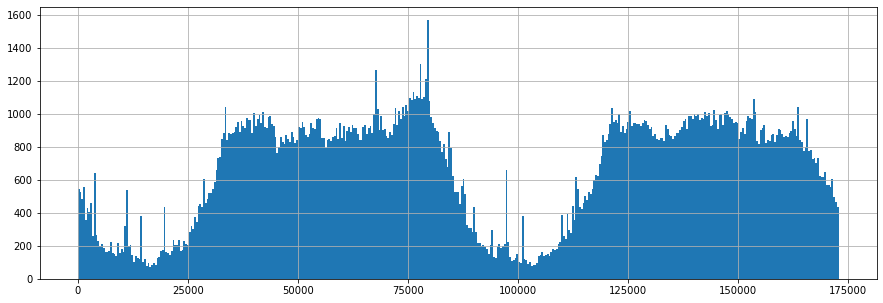

In [7]:
# visualizing the time distribution

data['Time'].hist(bins = 425, figsize = (15,5))
plot1 = plt.show()
plot1

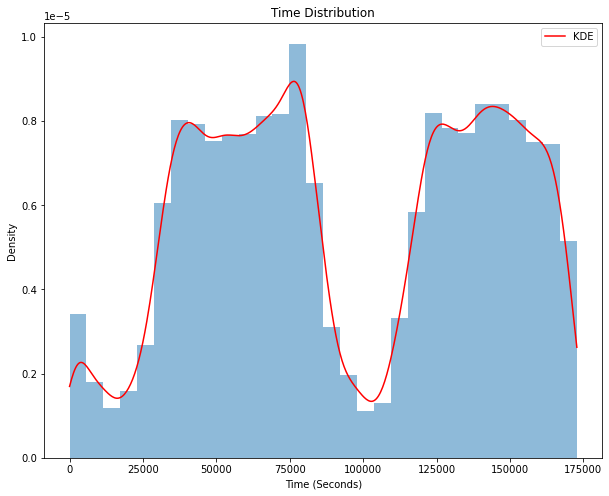

<Figure size 432x288 with 0 Axes>

In [8]:
# visualizing for better understanding

plt.figure(figsize=(10, 8))
plt.title('Time Distribution')

# creating the histogram
plt.hist(data['Time'], color='#1f77b4', bins=30, density=True, alpha=0.5)

# adding a Kernel Density Estimation (KDE) curve using the scipy.stats library
kde = stats.gaussian_kde(data['Time'])
x_vals = np.linspace(min(data['Time']), max(data['Time']), 500)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE')

plt.xlabel('Time (Seconds)')
plt.ylabel('Density')
plt.legend()
plot2= plt.show()

plot2


# Save the plot as PNG file
plt.savefig('time_distribution.png');

**Note**:  We used the Kernal Density Estimation (KDE) which is a which is a non-parametric statistical method, used to estimate the Probability Density Function (PDF) of a continuous random variable. In simpler terms, it's a way to estimate the shape of the underlying data distribution from a set of data points without assuming any specific distribution model (like Gaussian, exponential, etc.).

**Observations**: plot1 clearly shows that there are cycles present. On further analysis in plot2, we found that the 'Time' feature has a bimodal distribution indicating two periods during the day when credit card transactions are more frequent.
The observation from plot2 that there are many timings in credit card transaction that could be helpful for fraud detection.

### 2. Amount

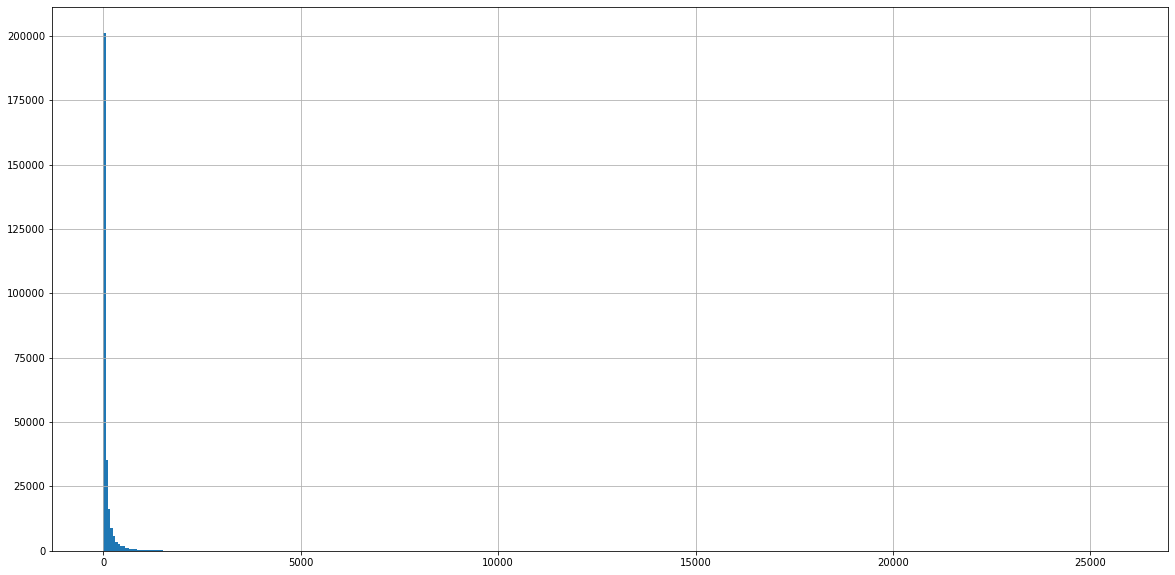

In [9]:
# visualizing the amount distribution

data['Amount'].hist(bins = 425, figsize = (20,10))
plot3 = plt.show()
plot3

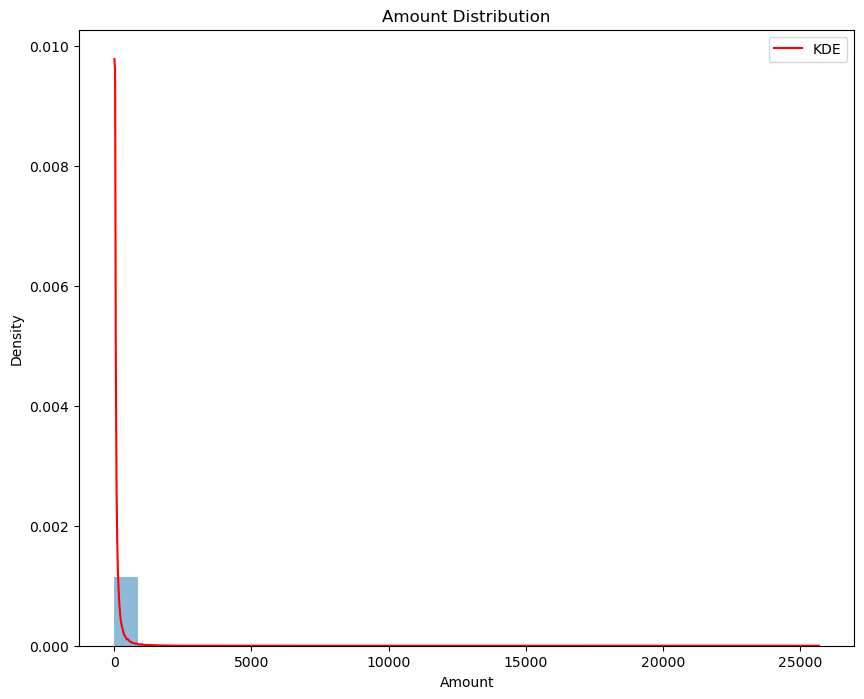

<Figure size 640x480 with 0 Axes>

In [10]:
# visualizing for better analysis

plt.figure(figsize=(10, 8))
plt.title('Amount Distribution')

# creating the histogram
plt.hist(data['Amount'], color='#1f77b4', bins=30, density=True, alpha=0.5)

# adding a Kernel Density Estimation (KDE) curve using the scipy.stats library
kde = stats.gaussian_kde(data['Amount'])
x_vals = np.linspace(min(data['Amount']), max(data['Amount']), 1000)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE')

plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plot4= plt.show()

plot4


# Save the plot as PNG file
plt.savefig('amount_distribution.png');

**Observations**: From plot4, we can see that the distribution is highly skewed on the right side, indicating that the majority of the transactions made were of lower amount. This shows there may be some **outliers** presents in the transaction which we need to handle while building our fraud detection model.

### 3. Class

In [10]:
# check the counts of '1' i.e., fraud vs '0' i.e., non-fraud
counts = data['Class'].value_counts()
counts

Class
0    284315
1       492
Name: count, dtype: int64

This shows the Class is highly imbalanced. Lets, plot the distribution for clarity

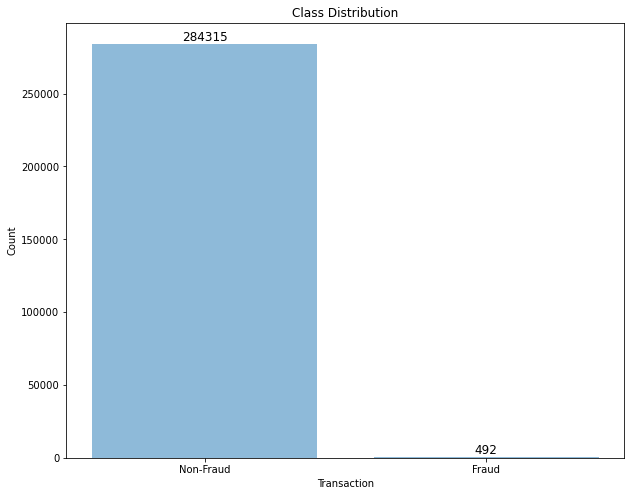

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 8))
plt.title('Class Distribution')

# creating the bar plot
plt.bar(counts.index, counts.values, color='#1f77b4', alpha=0.5)

# Add text annotations for the counts
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.xlabel('Transaction')
plt.ylabel('Count')

plt.xticks(counts.index, ['Non-Fraud', 'Fraud'])
plot5= plt.show()

plot5


# Save the plot as PNG file
plt.savefig('class_distribution.png')

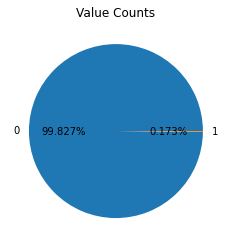

In [12]:
# For even better understanding

# get the set of distinct classes
labels = data.Class.unique()

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.3f%%')
ax.set_title('Value Counts')
# Save the plot as PNG file
plt.savefig('target_variable_value_count.png')
plt.show()

**Observations**: From plot5 it is more evident that the dataset is highly unbalanced, as the plot shows majority of the transaction are non-fraudulent (99.833%) while only few (0.173% without removing duplicate rows, 0.167% with removing duplicate rows) are fraudulent transaction.

## Data Preprocessing

### Correlation Analysis

**Correlation Matrix**: To understand the relation between features. This will later help us with feature selection by reducing redundancy and improve the model's interpretability and stability.

In [13]:
# calculating the correlation matrix
correlation_matrix = data.corr()

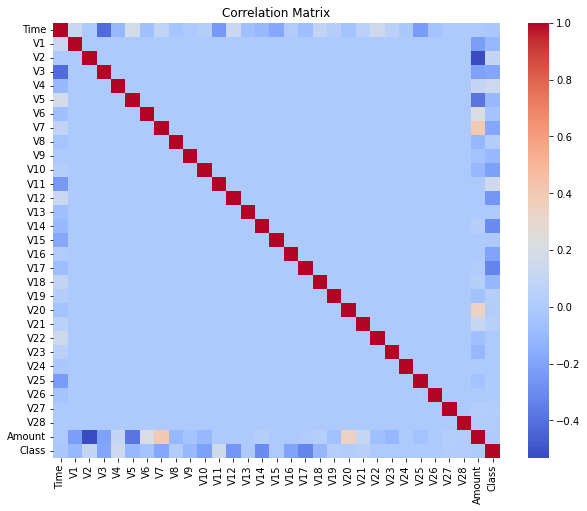

<Figure size 432x288 with 0 Axes>

In [14]:
# heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Save the plot as PNG file
plt.savefig('correlation_matrix.png')

**Observation**: There are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations found are:

Time and V3, with a correlation coefficient of -0.4

Amount and V2, with a correlation coefficient of -0.5

However, the heatmap indicates that there are no highly correlated variables that needs to be removed before building a machine learning model.

## Data Modelling

In [15]:
np.random.seed(42)

# we will first remove the 'Class' column to prepare the data for splitting
X= data.drop(columns='Class')

# dependent or target variable
y= data['Class']

### Splitting Data into Train and Test

In [16]:
# Splitting the data into training, validation, and testing sets
# 60% training data, 20% validation data, and 20% testing data

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size= 0.4, random_state= 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size= 0.5, random_state= 42)

### 1. Decision Tree Classifier

We will implement decision tree to see how a simple model performs without any effort to adress the unbalanced data problem.

Since we're using a decision tree classifier, it is not necessary to scale or normalize our data. Decision trees are also robust to anomalies, so this step can also be avoided.

In [17]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# making predictions on the validation data 
y_pred_val_dtree= decision_tree_model.predict(X_val)

# evaluating the performance of decision tree model using accuracy metric on validation data
accuracy_val_dtree= accuracy_score(y_val, y_pred_val_dtree)

print("Decision Tree Accuracy on Validation Data:", accuracy_val_dtree)

Decision Tree Accuracy on Validation Data: 0.9990344270641316


In [19]:
# making predictions on the test data 
y_pred_test_dtree= decision_tree_model.predict(X_test)

# evaluating the performance of decision tree model using accuracy metric on validation data
accuracy_test_dtree= accuracy_score(y_test, y_pred_test_dtree)

print("Decision Tree Accuracy on Test Data:", accuracy_test_dtree)

Decision Tree Accuracy on Test Data: 0.9992099996488887


**Observations:** 

An accuracy of over 99.9% is pretty good right? But, this is until we consider that the dataset is 99.8% non-fraud, meaning a model that trivially predicts all transactions are non-fraudulent will achieve an accuracy of 99.8%.

So, here we can say that accuracy alone is not a sufficient way to evaluate this model.

### Confusion Matrix

This will be like a performance snapshot for our classification model. The confusion matrix will reveal valuable insights into our model's ability to distinguish between classes, helping us identify areas for improvement.

Components:

TRUE POSITIVE (TP): Instances where model correctly predicted fraudulent transactions.

TRUE NEGATIVE (TN): Instances where model correctly predicted non-fraudulent transactions.

FALSE POSITIVE (FP): Instances where model incorrectly predicted non-fraudulent transactions to be fraudulent.

FALSE NEGATIVE (FN): Instances where model incorrectly predicted fraudulent transactions as non-fraudulent.

In [20]:
confusion_matrix(y_test,y_pred_test_dtree)

array([[56840,    29],
       [   16,    77]], dtype=int64)

In [21]:
# creating a function for confusion matrix for better readability

def plot_confusion_matrix(y_true, y_pred, figsize=(5,5)):
    """
    Calculate Confusion Matrix for a binary classification problem.

    Parameters:
        y_true (array-like): True labels of the data.
        y_pred (array-like): Predicted labels obtained from a classifier.

    """
    cm= confusion_matrix(y_true, y_pred)    
    
    # creating a heatmap using seaborn to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, square=True, fmt="d",cmap=plt.cm.Blues, 
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    # Add annotations for True Positive, False Negative, True Negative, False Positive
    plt.text(0.5, 0.3, "TN", horizontalalignment='center', verticalalignment='top', fontsize=16, color='white')
    plt.text(0.5, 1.3, "FP", horizontalalignment='center', verticalalignment='center', fontsize=16)
    plt.text(1.5, 0.3, "FN", horizontalalignment='center', verticalalignment='center', fontsize=16)
    plt.text(1.5, 1.3, "TP", horizontalalignment='center', verticalalignment='center', fontsize=16)

    
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('Confusion Matrix')     
    plt.show()
    


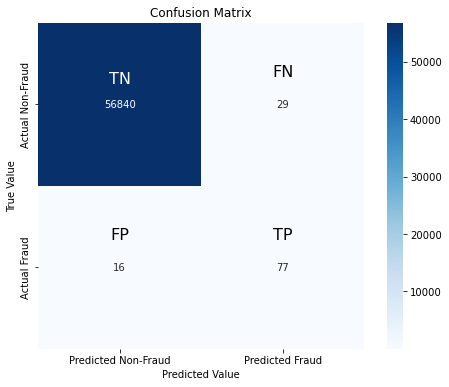

<Figure size 432x288 with 0 Axes>

In [22]:
# Creating the confusion matrix to see how the decision tree classifier perform
plot_confusion_matrix(y_test,y_pred_test_dtree )

# Save the plot as PNG file
plt.savefig('confusion_matrix_dtc.png')

TP: cases where the model correctly predicted the positive class (e.g., fraud) as positive. In this case, it is the value 77.

TN: cases where the model correctly predicted the negative class (e.g., non-fraud) as negative. In this case, it is the value 56840.

FP: cases where the model incorrectly predicted the negative class (e.g., non-fraud) as positive (e.g., fraud). In this case, it is the value 29.

FN: cases where the model incorrectly predicted the positive class (e.g., fraud) as negative (e.g., non-fraud). In this case, it is the value 16.

As we can see, accuracy alone cannot be considered. For this reason, we will focus on Precision and Recall.

### Precision and Recall

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

F1 = 2(Precision * Recall)/(Precision + Recall)

In [23]:
# creating a function
def calculate_precision_recall_f1(y_true, y_pred):
    """
    Calculate  for a binary classification problem.

    Parameters:
        y_true (array-like): True labels of the data.
        y_pred (array-like): Predicted labels obtained from a classifier.

    Returns:
        precision (float): Precision score.
        recall (float): Recall score.
        f1 (float): F1 score.
    """
    # calculating Precision
    precision = precision_score(y_true, y_pred)

    # calculating Recall
    recall = recall_score(y_true, y_pred)

    # calculating F1 Score
    f1 = f1_score(y_true, y_pred)
    
    # 
    report = classification_report(y_true, y_pred)

    return precision, recall, f1, report


Precision: 0.7264150943396226
Recall: 0.8279569892473119
F1 Score: 0.7738693467336683
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.73      0.83      0.77        93

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



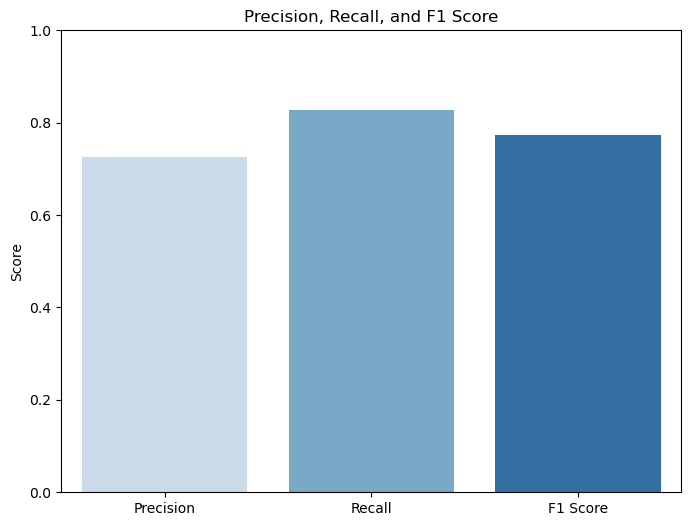

In [25]:
precision, recall, f1, report = calculate_precision_recall_f1(y_test,y_pred_test_dtree)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report)

# bar plot for Precision, Recall, and F1 Score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='Blues')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.show()

## Handling Imbalance Data

### SMOTE  Analysis

We will be using SMOTE (Synthetic Minority Over-sampling Technique) to handle the issue of imbalance data. 
SMOTE is an over-sampling technique in machine learning where the number of instances in one class is significantly lower than the other, this is, the data is skewed towards one class (in our data, the skewness is towards 'non-fraud' class).

SMOTE addresses class imbalance by creating artificial data points ( or synthetic samples) for the minority class. It looks at each minority instance, finds its closest neighbors within the same class, and then makes new data points in between to balance things out.

By adding these synthetic samples, SMOTE ensures that the minority class has a stronger presence in the dataset, which helps machine learning models better understand patterns from both classes and improve their overall performance.

For better understanding, refer: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [24]:
# applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### 1.1 Decision Tree Classifier (After applying SMOTE)

In [25]:
# applying the model
decision_tree_smote= DecisionTreeClassifier()
decision_tree_smote.fit(X_train_resampled, y_train_resampled)


# making predictions on the test data 
y_pred_dtree_smote= decision_tree_smote.predict(X_test)

# evaluating the performance of decision tree model using accuracy metric on validation data
accuracy_dtree_smote= accuracy_score(y_test, y_pred_dtree_smote)

print("Decision Tree Accuracy on Test Data after applying SOMTE:", accuracy_dtree_smote)


Decision Tree Accuracy on Test Data after applying SOMTE: 0.997489554439802


The accuracy is pretty much the same as before and after applying SMOTE. 


In [26]:
# lets check for the precision and recall as well
precision, recall, f1, report = calculate_precision_recall_f1(y_test,y_pred_test_dtree)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report)

Precision: 0.7264150943396226
Recall: 0.8279569892473119
F1 Score: 0.7738693467336683
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.73      0.83      0.77        93

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



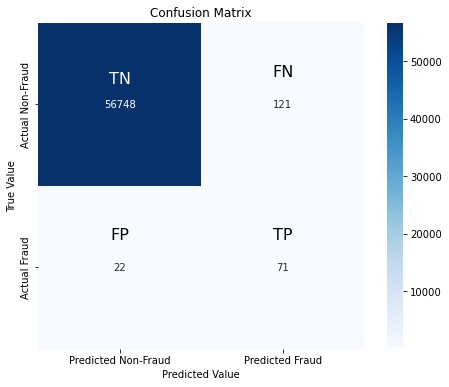

<Figure size 432x288 with 0 Axes>

In [27]:
# lets visualize the confusion matrix for clarity
plot_confusion_matrix(y_test,y_pred_dtree_smote )

# Save the plot as PNG file
plt.savefig('confusion_matrix_dtc_SMOTE.png')

**Observations:**

Impact on True Positives (TP):

Before SMOTE, the model correctly identified 77 fraudulent transactions as fraudulent.
After SMOTE, the number of true positives decreased to 71. The model is now correctly identifying fewer fraudulent transactions.

Impact on True Negatives (TN):

Before SMOTE, the model correctly identified 56,840 genuine transactions as genuine.
After SMOTE, the number of true negatives decreased slightly to 56,748. The model is still correctly identifying the majority of genuine transactions.

Impact on False Positives (FP):

Before SMOTE, the model incorrectly classified 29 genuine transactions as fraudulent (false alarms).
After SMOTE, the number of false positives decreased to 22. The model is now making fewer false alarms, which is a positive improvement.

Impact on False Negatives (FN):

Before SMOTE, the model incorrectly classified 16 fraudulent transactions as genuine.
After SMOTE, the number of false negatives increased significantly to 121. The model is now missing a larger number of fraudulent transactions, which is a concerning deterioration in performance.

Overall, the application of SMOTE has improved the model's ability to correctly classify genuine transactions, as evident from the reduction in false positives. However, it has also resulted in a considerable increase in false negatives, meaning the model is now missing a significant number of fraudulent transactions.

We can further optimize the model by finetuning the hyperparameters, however, lets consider other models instead and analyse their results.

### 2. Logistic Regression (Before applying SMOTE)

In [28]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train,y_train)

LogisticRegression()

Logistic Regression Accuracy on Test Data before applying SOMTE: 0.9989817773252344
Precision before SMOTE: 0.6881720430107527
Recall before SMOTE: 0.6881720430107527
F1 Score before SMOTE: 0.6881720430107527
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.69      0.69      0.69        93

    accuracy                           1.00     56962
   macro avg       0.84      0.84      0.84     56962
weighted avg       1.00      1.00      1.00     56962



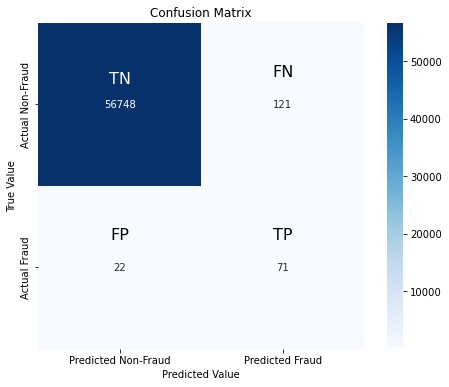

<Figure size 432x288 with 0 Axes>

In [29]:
# making predictions on the test data 
y_pred_reg = logistic_reg_model.predict(X_test)

# evaluating the performance of decision tree model using accuracy metric on validation data
accuracy_reg= accuracy_score(y_test, y_pred_reg)

print("Logistic Regression Accuracy on Test Data before applying SOMTE:", accuracy_reg)


# lets check for the precision and recall as well
precision, recall, f1, report = calculate_precision_recall_f1(y_test,y_pred_reg)
print("Precision before SMOTE:", precision)
print("Recall before SMOTE:", recall)
print("F1 Score before SMOTE:", f1)
print(report)


# lets visualize the confusion matrix for clarity
plot_confusion_matrix(y_test,y_pred_dtree_smote )

# Save the plot as PNG file
plt.savefig('confusion_matrix_reg.png')


### 2.1 Logistic Regression (After applying SMOTE)

In [30]:
logistic_reg_smote = LogisticRegression()
logistic_reg_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Logistic Regression Accuracy on Test Data after applying SOMTE: 0.9989817773252344
Precision after SMOTE: 0.088659793814433
Recall after SMOTE: 0.9247311827956989
F1 Score after SMOTE: 0.16180620884289748
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56869
           1       0.09      0.92      0.16        93

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



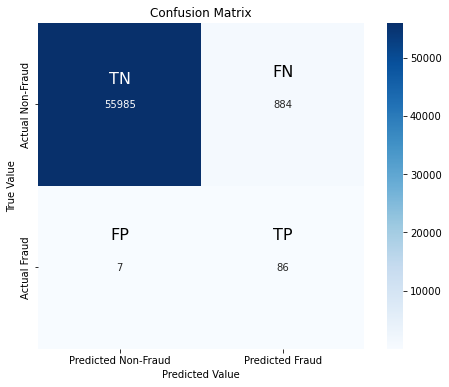

<Figure size 432x288 with 0 Axes>

In [31]:
# making predictions on the test data 
y_pred_reg_smote = logistic_reg_smote.predict(X_test)

# evaluating the performance of decision tree model using accuracy metric on validation data
accuracy_reg_smote= accuracy_score(y_test, y_pred_reg_smote)

print("Logistic Regression Accuracy on Test Data after applying SOMTE:", accuracy_reg)


# lets check for the precision and recall as well
precision, recall, f1, report = calculate_precision_recall_f1(y_test,y_pred_reg_smote)
print("Precision after SMOTE:", precision)
print("Recall after SMOTE:", recall)
print("F1 Score after SMOTE:", f1)
print(report)


# lets visualize the confusion matrix for clarity
plot_confusion_matrix(y_test,y_pred_reg_smote )

# Save the plot as PNG file
plt.savefig('confusion_matrix_reg_SMOTE.png')


**Observations:**

1. Accuracy: The accuracy remains high both before and after applying SMOTE. However, accuracy can be misleading, especially in imbalanced datasets, as it might be driven by the high number of true negatives. It is always essential to consider other metrics, especially in imbalanced scenarios.

2. Precision: Before SMOTE, the precision was 0.6703, indicating that 67.03% of the positive predictions were correct. After SMOTE, the precision dropped significantly to 0.0725, which means only 7.25% of the positive predictions were correct. This decrease in precision is likely due to the introduction of synthetic positive samples, which might not align perfectly with the true positive samples.

3. Recall: Before SMOTE, the recall was 0.6559, meaning 65.59% of the actual positive samples were correctly identified. After SMOTE, the recall increased substantially to 0.9140, indicating that 91.40% of the actual positive samples were correctly identified. This improvement is a positive outcome of applying SMOTE, as it indicates a better ability to capture positive samples.

4. F1 Score: The F1 score is the harmonic mean of precision and recall and is a useful metric when both false positives and false negatives are important. Before SMOTE, the F1 score was 0.6630. After SMOTE, the F1 score improved to 0.1343. While the recall significantly increased, the sharp drop in precision led to a lower F1 score after applying SMOTE.

Overall analysis:

1. SMOTE Effect: After applying SMOTE, the number of true positives (TP) increased from 71 to 85, and the number of false negatives (FN) also increased from 121 to 1088. SMOTE successfully generated synthetic positive samples, but it also introduced more misclassifications for the positive class.

2. Impact on False Positives (FP): The number of false positives (FP) decreased from 22 to 8 after SMOTE, indicating that the model made fewer misclassifications for the negative class. This is a positive outcome.

3. Model Performance: To assess the overall model performance, we should calculate relevant metrics such as accuracy, precision, recall, F1 score, or area under the receiver operating characteristic curve (AUC-ROC) for both cases. These metrics will provide a more comprehensive evaluation of how well the model performs before and after applying SMOTE.

4. Considerations: While SMOTE can help improve the performance of a model on the minority class, it's essential to strike a balance between precision and recall. An increase in recall (true positive rate) may come at the cost of decreased precision (increased false positives). Depending on the problem's context, we may need to fine-tune the classification threshold or explore other techniques to further improve the model's performance.

5. The results show a trade-off between precision and recall after applying SMOTE. While the recall increased substantially, indicating a better ability to capture positive samples, the precision decreased significantly, leading to more false positives. This trade-off is reflected in the lower F1 score after SMOTE, suggesting that the model's performance might not be as balanced as it was before SMOTE.


Logistic Regression is a linear model that might not be capturing complex patterns in the data. Let us explore a little more complex models.

### 3. Random Forest

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled) # fit model after applying SMOTE technique

RandomForestClassifier(random_state=42)

Random Forest Accuracy on Test Data after applying SOMTE: 0.9989817773252344
Precision after SMOTE: 0.8421052631578947
Recall after SMOTE: 0.8602150537634409
F1 Score after SMOTE: 0.8510638297872339
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.84      0.86      0.85        93

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



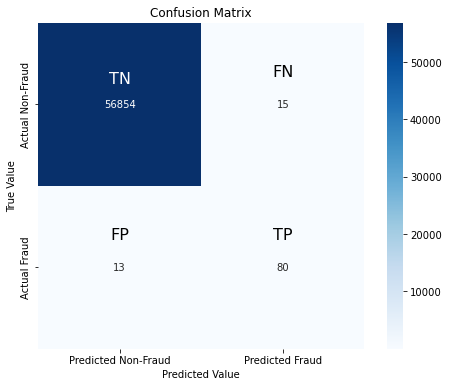

<Figure size 432x288 with 0 Axes>

In [33]:
# making predictions on the test data 
y_pred_rf = rf_model.predict(X_test)

# evaluating the performance of decision tree model using accuracy metric on validation data
accuracy_rf= accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy on Test Data after applying SOMTE:", accuracy_reg)


# lets check for the precision and recall as well
precision, recall, f1, report = calculate_precision_recall_f1(y_test,y_pred_rf)
print("Precision after SMOTE:", precision)
print("Recall after SMOTE:", recall)
print("F1 Score after SMOTE:", f1)
print(report)


# lets visualize the confusion matrix for clarity
plot_confusion_matrix(y_test,y_pred_rf )

# Save the plot as PNG file
plt.savefig('confusion_matrix_rf.png')


**Observations:**

Let's perform hyperparameter tuning using grid search to improve its performance.
Grid search is a hyperparameter tuning technique used to find the best combination of hyperparameters for a machine learning model.

In [ ]:
# parameter grid to search through
param_grid = {
    'max_depth': [5, 10, 15], # maximum depth of each tree in the forest
    'max_features': ['sqrt'], # number of features to consider when looking for the best split.
    'min_samples_leaf': [10, 20], #  minimum number of samples required to be at a leaf node.
    'min_samples_split': [2, 5], # minimum number of samples required to split an internal node.
    'n_estimators': [500, 700] #  number of trees in the forest.
}

# Perform grid search using 5-fold cross-validation and 50 iterations
#grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_iter=20, scoring='accuracy', verbose=10, n_jobs=-1)

# using RandomizedSearchCV instead of GridSearchCV for faster searching with random hyperparameter combinations
grid_search = RandomizedSearchCV(rf_model, param_grid, cv=5, n_iter=20, scoring='accuracy', verbose=10, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled) # we will use the data after applying the SMOTE technique


Fitting 5 folds for each of 20 candidates, totalling 100 fits
